In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
import numpy as np

In [2]:
grade_math = pd.read_csv('uk_math_scores_dataset.csv')
grade_math

,Name,Gender,Class,Math_Score
0,Grace Lewis,Female,7C,13.6
1,Jacob Hall,Male,7D,14.6
2,Harrison Davis,Male,7A,13.9
3,Amelia Davis,Female,7C,11.7
4,Sophia Hall,Female,7C,16.3
...,...,...,...,...
295,Oliver Scott,Male,7D,15.0
296,Evie Williams,Female,7B,15.4
297,Charlie Williams,Male,7C,11.8
298,Charlotte Allen,Female,7A,10.9


In [3]:
mean_grade = grade_math['Math_Score'].mean()
stdev_grade = grade_math['Math_Score'].std(ddof=0)
print('Mean number of score is {:.2f}'.format(mean_grade))
print('Standard deviation is {:.2f}'.format(stdev_grade))

Mean number of score is 13.99
Standard deviation is 2.43


In [4]:
zscore_grade = ss.zscore(grade_math['Math_Score'], ddof=0)
grade_math = grade_math.assign(zscore=zscore_grade)
grade_math.head(21)

,Name,Gender,Class,Math_Score,zscore
0,Grace Lewis,Female,7C,13.6,-0.158988
1,Jacob Hall,Male,7D,14.6,0.251834
2,Harrison Davis,Male,7A,13.9,-0.035741
3,Amelia Davis,Female,7C,11.7,-0.939549
4,Sophia Hall,Female,7C,16.3,0.950231
5,James Hall,Male,7D,15.5,0.621573
6,Ella Williams,Female,7A,15.6,0.662656
7,Charlotte Johnson,Female,7A,12.2,-0.734139
8,Harrison Lewis,Male,7C,16.8,1.155642
9,Benjamin Brown,Male,7B,11.2,-1.144960


In [5]:
def plot_anomaly_grade(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data > threshold)
    
    plt.figure(dpi=200,figsize=(20,20))
    plt.plot(ranks[mask_outlier], score_data[mask_outlier], 'o', color='r', label='anomalies')
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier], 'o', color='b', label='typical player')
    plt.axhline(threshold,color='r', label='threshold', alpha=0.5)
    plt.legend(loc='upper right')
    plt.title('Z-score vs. player', fontweight='bold')
    plt.xticks(np.arange(0, 300, step=20.0))
    plt.xlabel('Player Rank')
    plt.ylabel('Z-score')
    plt.show()

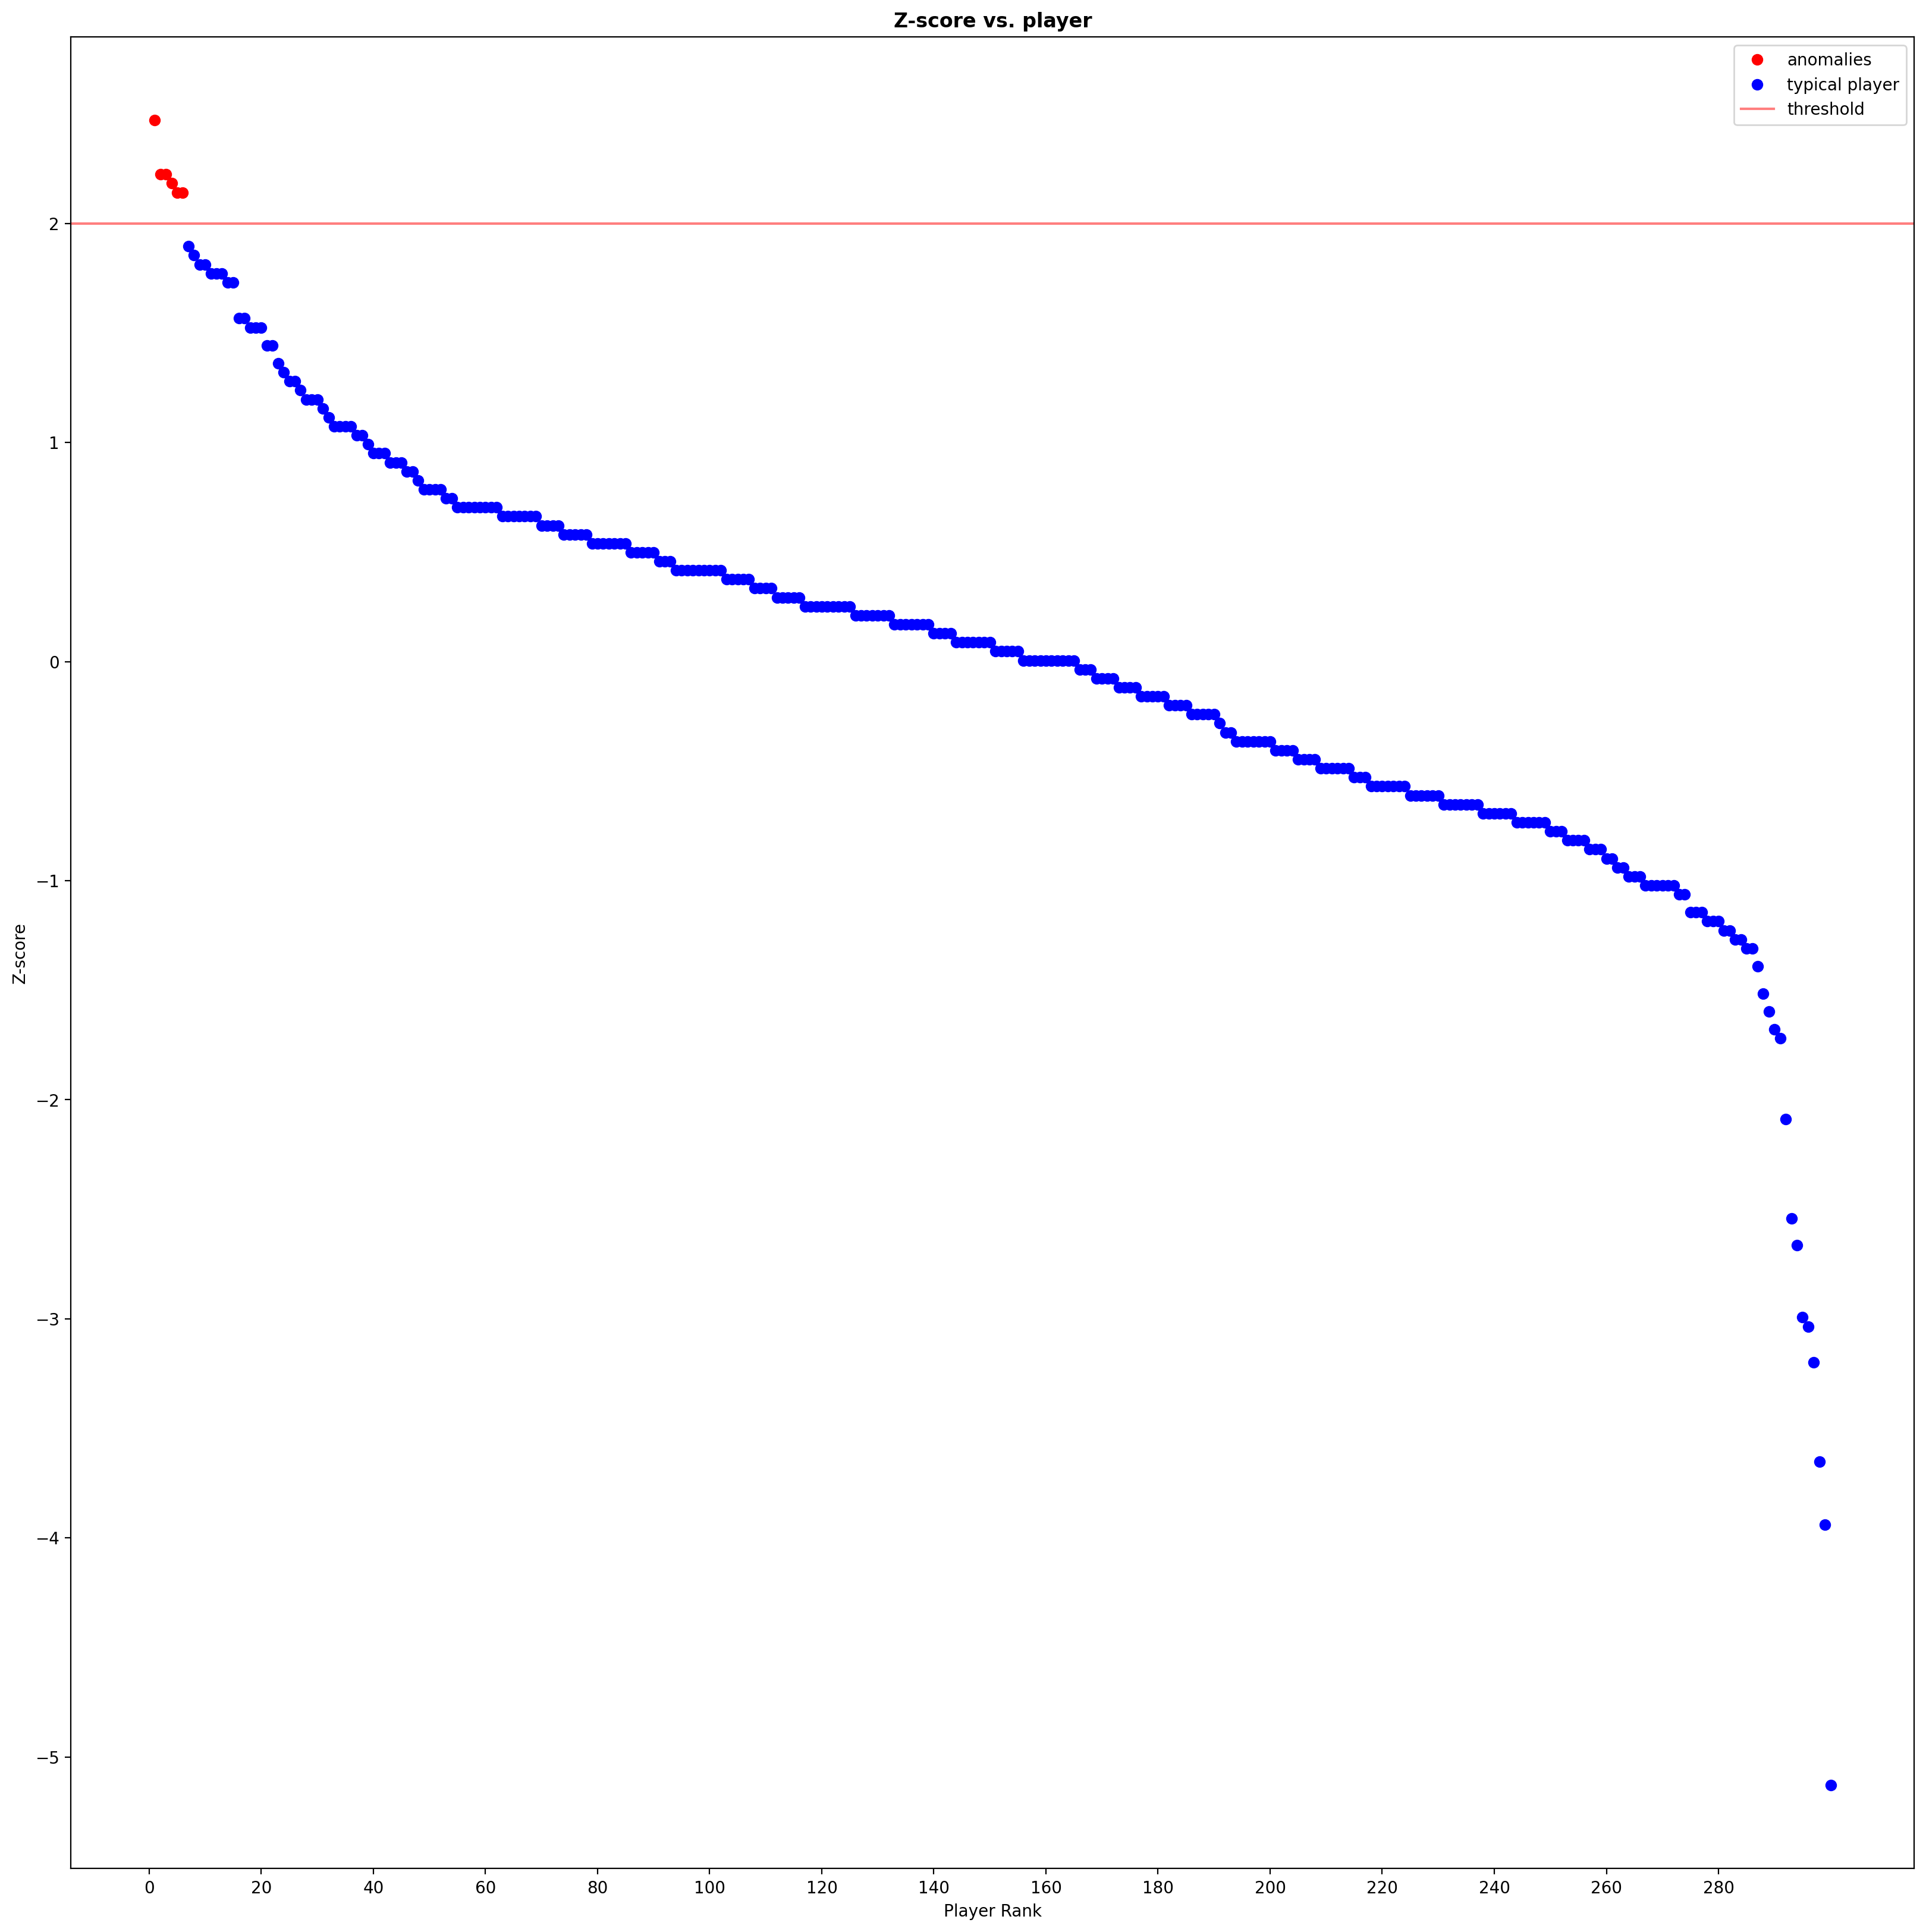

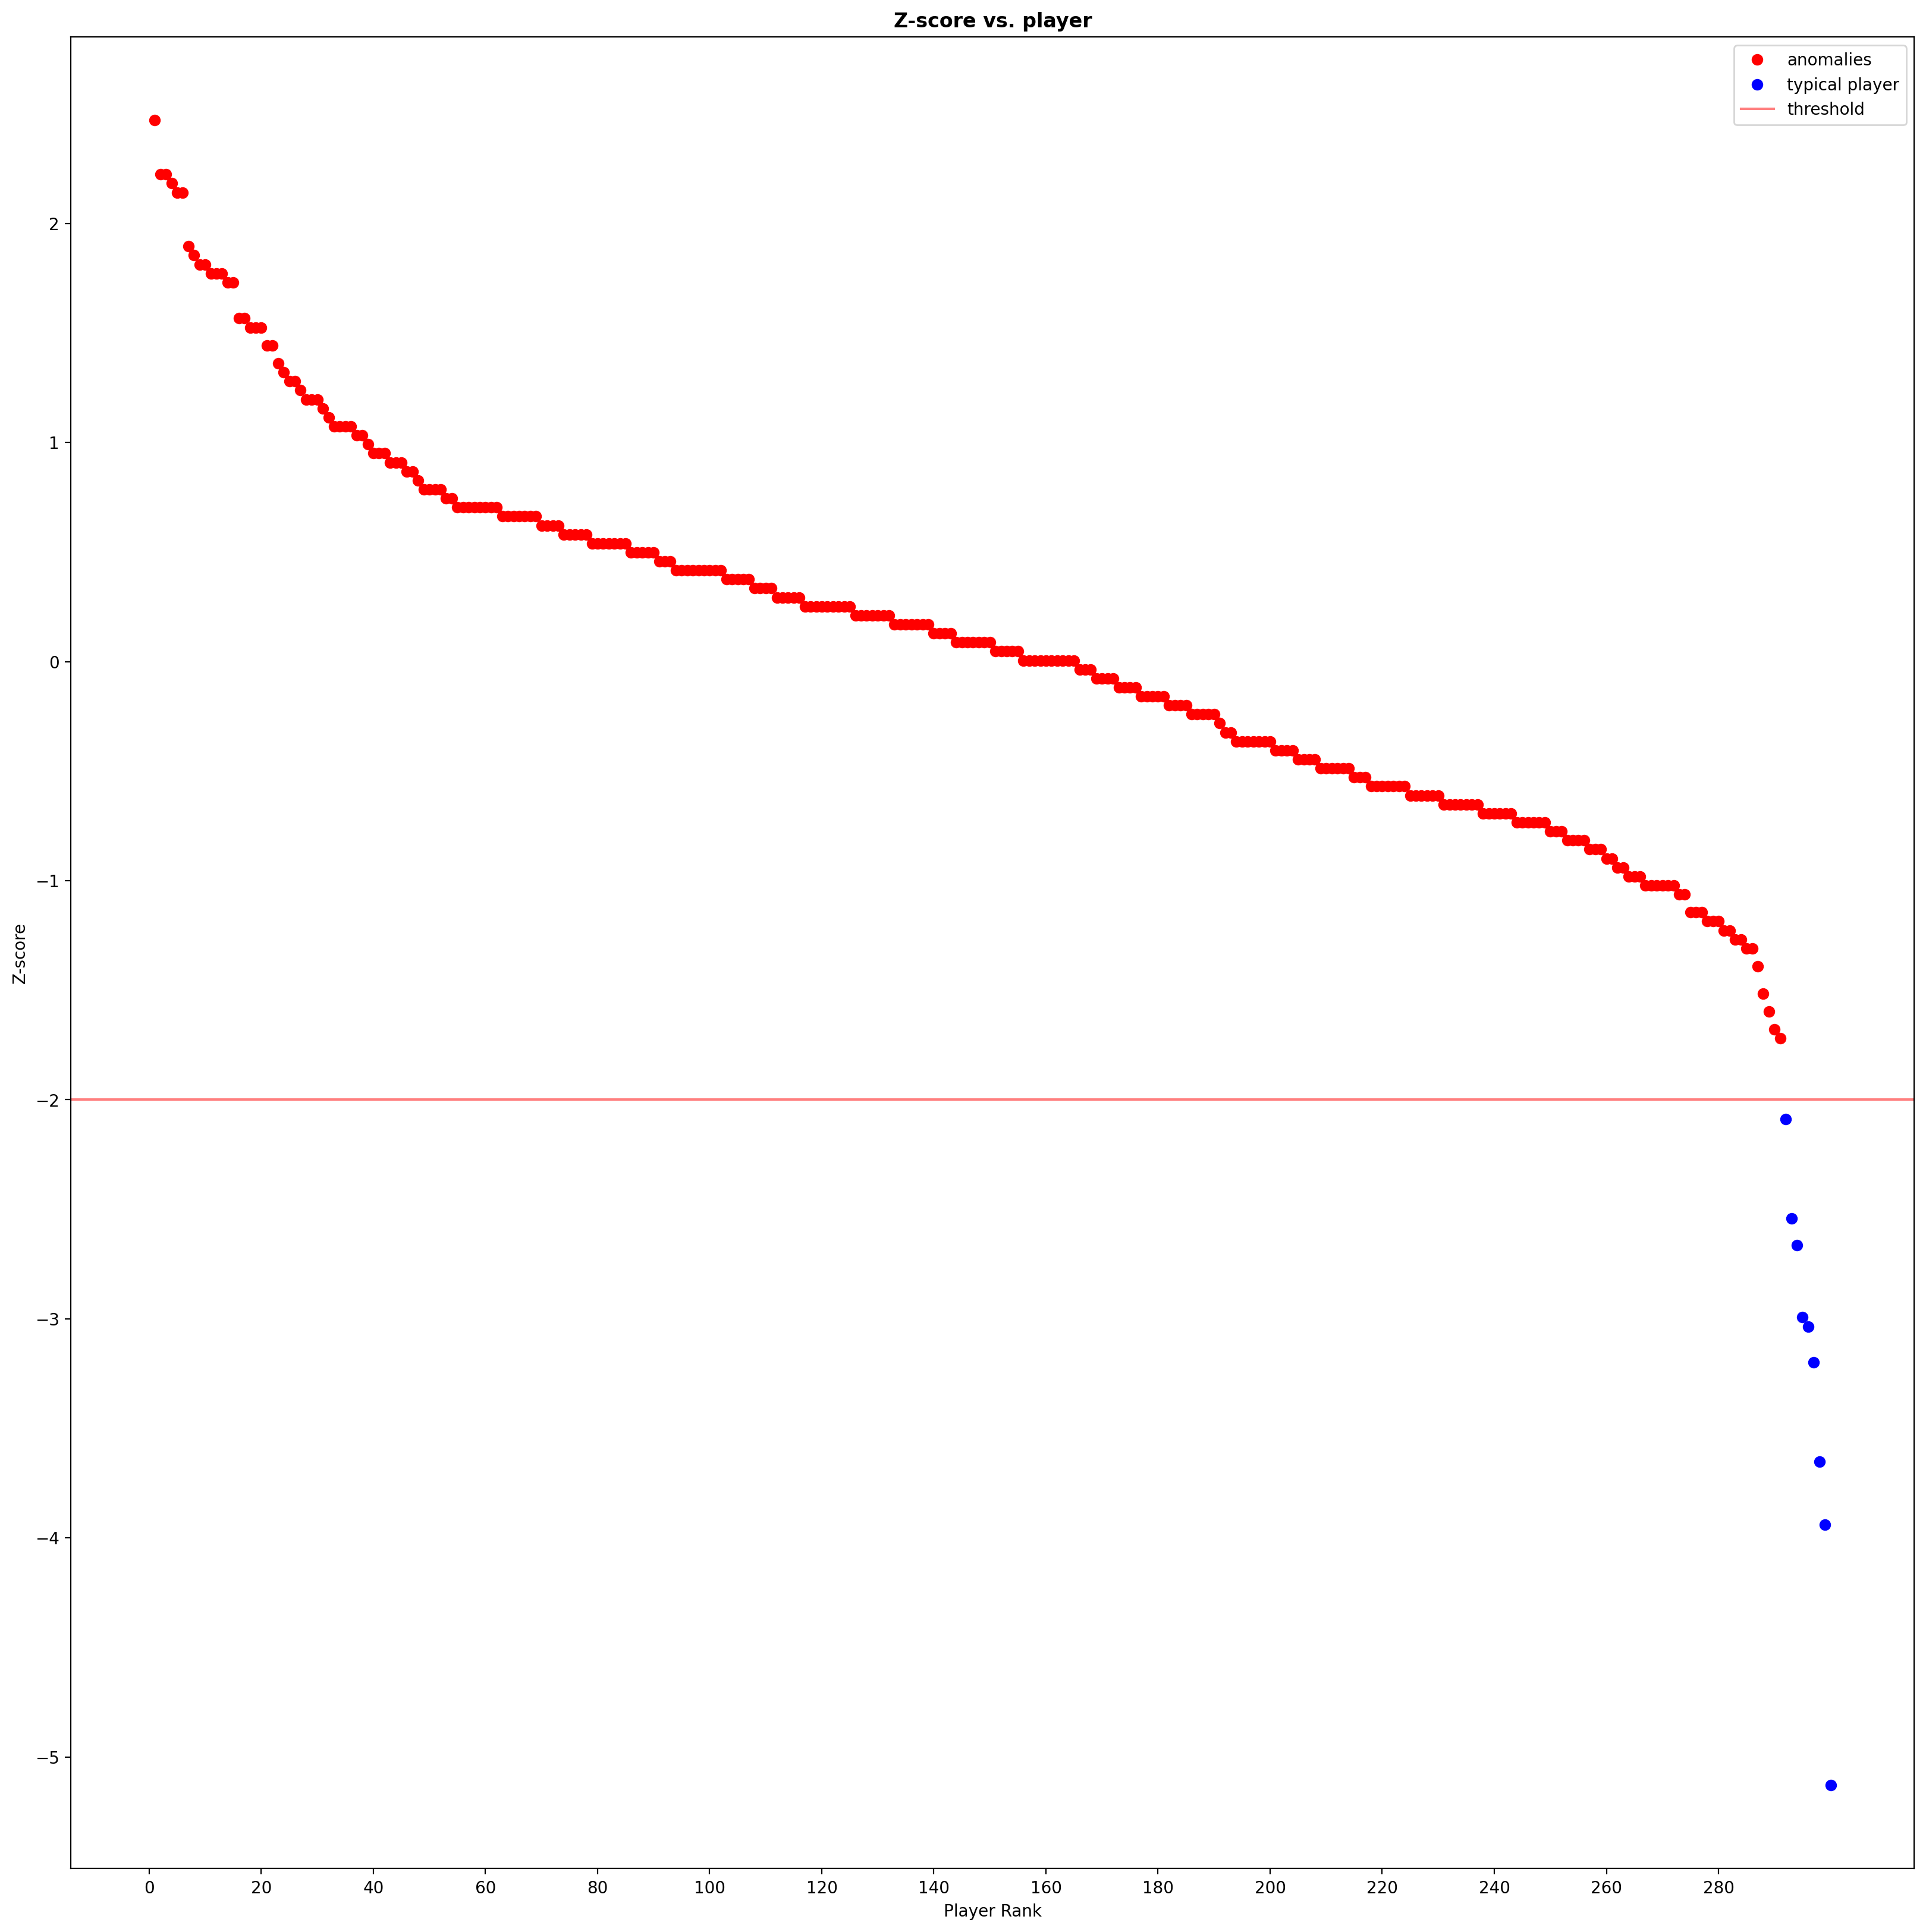

In [6]:
plot_anomaly_grade(grade_math['zscore'],2)
plot_anomaly_grade(grade_math['zscore'],-2)

In [7]:
anomaly_grade = grade_math[grade_math['zscore'] > 2]
anomaly_grade

,Name,Gender,Class,Math_Score,zscore
65,Sophia Smith,Female,7B,19.4,2.223778
95,Benjamin Clark,Male,7B,20.0,2.470271
115,Rosie Anderson,Female,7D,19.2,2.141614
128,Evie Young,Female,7D,19.4,2.223778
213,George Brown,Male,7C,19.2,2.141614
291,Jacob Clark,Male,7C,19.3,2.182696


In [8]:
anomaly_grade = grade_math[grade_math['zscore'] < -2]
anomaly_grade

,Name,Gender,Class,Math_Score,zscore
51,Ruby Allen,Female,7B,5.1,-3.650973
70,Freya Lewis,Female,7B,7.8,-2.541754
84,Alexander Moore,Male,7C,8.9,-2.089850
148,Alfie Garcia,Male,7A,7.5,-2.665001
158,Oscar Clark,Male,7A,1.5,-5.129932
172,Logan Moore,Male,7C,4.4,-3.938548
175,Charlie Smith,Male,7B,6.7,-2.993658
218,Jack White,Male,7D,6.2,-3.199069
241,George Scott,Male,7C,6.6,-3.034741


## zscore modified

### implements of zsore modified

In [9]:
median_score = np.median(grade_math['Math_Score'])
median_score

14.149999999999999

In [10]:
def modified_zscore(data, consistency_correction=1.4826):
    """
    Returns the modified z score and Median Absolute Deviation (MAD) from the scores in data.
    The consistency_correction factor converts the MAD to the standard deviation for a given
    distribution. The default value (1.4826) is the conversion factor if the underlying data
    is normally distributed
    """
    median = np.median(data)
    
    deviation_from_med = np.array(data) - median

    mad = np.median(np.abs(deviation_from_med))
    mod_zscore = deviation_from_med/(consistency_correction*mad)
    return mod_zscore, mad

In [11]:
mod_zscore_grade, mad_grade = modified_zscore(grade_math['Math_Score'])
grade_math = grade_math.assign(mod_zscore=mod_zscore_grade)
grade_math.head(21)

,Name,Gender,Class,Math_Score,zscore,mod_zscore
0,Grace Lewis,Female,7C,13.6,-0.158988,-0.255841
1,Jacob Hall,Male,7D,14.6,0.251834,0.209325
2,Harrison Davis,Male,7A,13.9,-0.035741,-0.116292
3,Amelia Davis,Female,7C,11.7,-0.939549,-1.139657
4,Sophia Hall,Female,7C,16.3,0.950231,1.000107
5,James Hall,Male,7D,15.5,0.621573,0.627974
6,Ella Williams,Female,7A,15.6,0.662656,0.674491
7,Charlotte Johnson,Female,7A,12.2,-0.734139,-0.907074
8,Harrison Lewis,Male,7C,16.8,1.155642,1.232690
9,Benjamin Brown,Male,7B,11.2,-1.144960,-1.372240


In [12]:
anomaly_grade1 = grade_math[grade_math['mod_zscore'] > 2]
anomaly_grade1

,Name,Gender,Class,Math_Score,zscore,mod_zscore
15,Poppy Davis,Female,7A,18.5,1.854039,2.023472
65,Sophia Smith,Female,7B,19.4,2.223778,2.442122
95,Benjamin Clark,Male,7B,20.0,2.470271,2.721221
106,Benjamin Scott,Male,7B,18.6,1.895121,2.069989
115,Rosie Anderson,Female,7D,19.2,2.141614,2.349089
128,Evie Young,Female,7D,19.4,2.223778,2.442122
213,George Brown,Male,7C,19.2,2.141614,2.349089
291,Jacob Clark,Male,7C,19.3,2.182696,2.395605


In [13]:
def plot_anomaly_score_2(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outliers = (score_data > threshold)
    
    plt.figure(dpi=150,figsize=(20,25))
    plt.plot(ranks[mask_outliers], score_data[mask_outliers],'o', color='r',label='anomalies')
    plt.plot(ranks[~mask_outliers], score_data[~mask_outliers],'o', color='b', label='typical player')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'upper right')
    plt.title('Modified z-score vs. player', fontweight='bold')
    plt.xticks(np.arange(0, 300, step=15.0))
    plt.xlabel('Player')
    plt.ylabel('Modified z-score')
    plt.show()

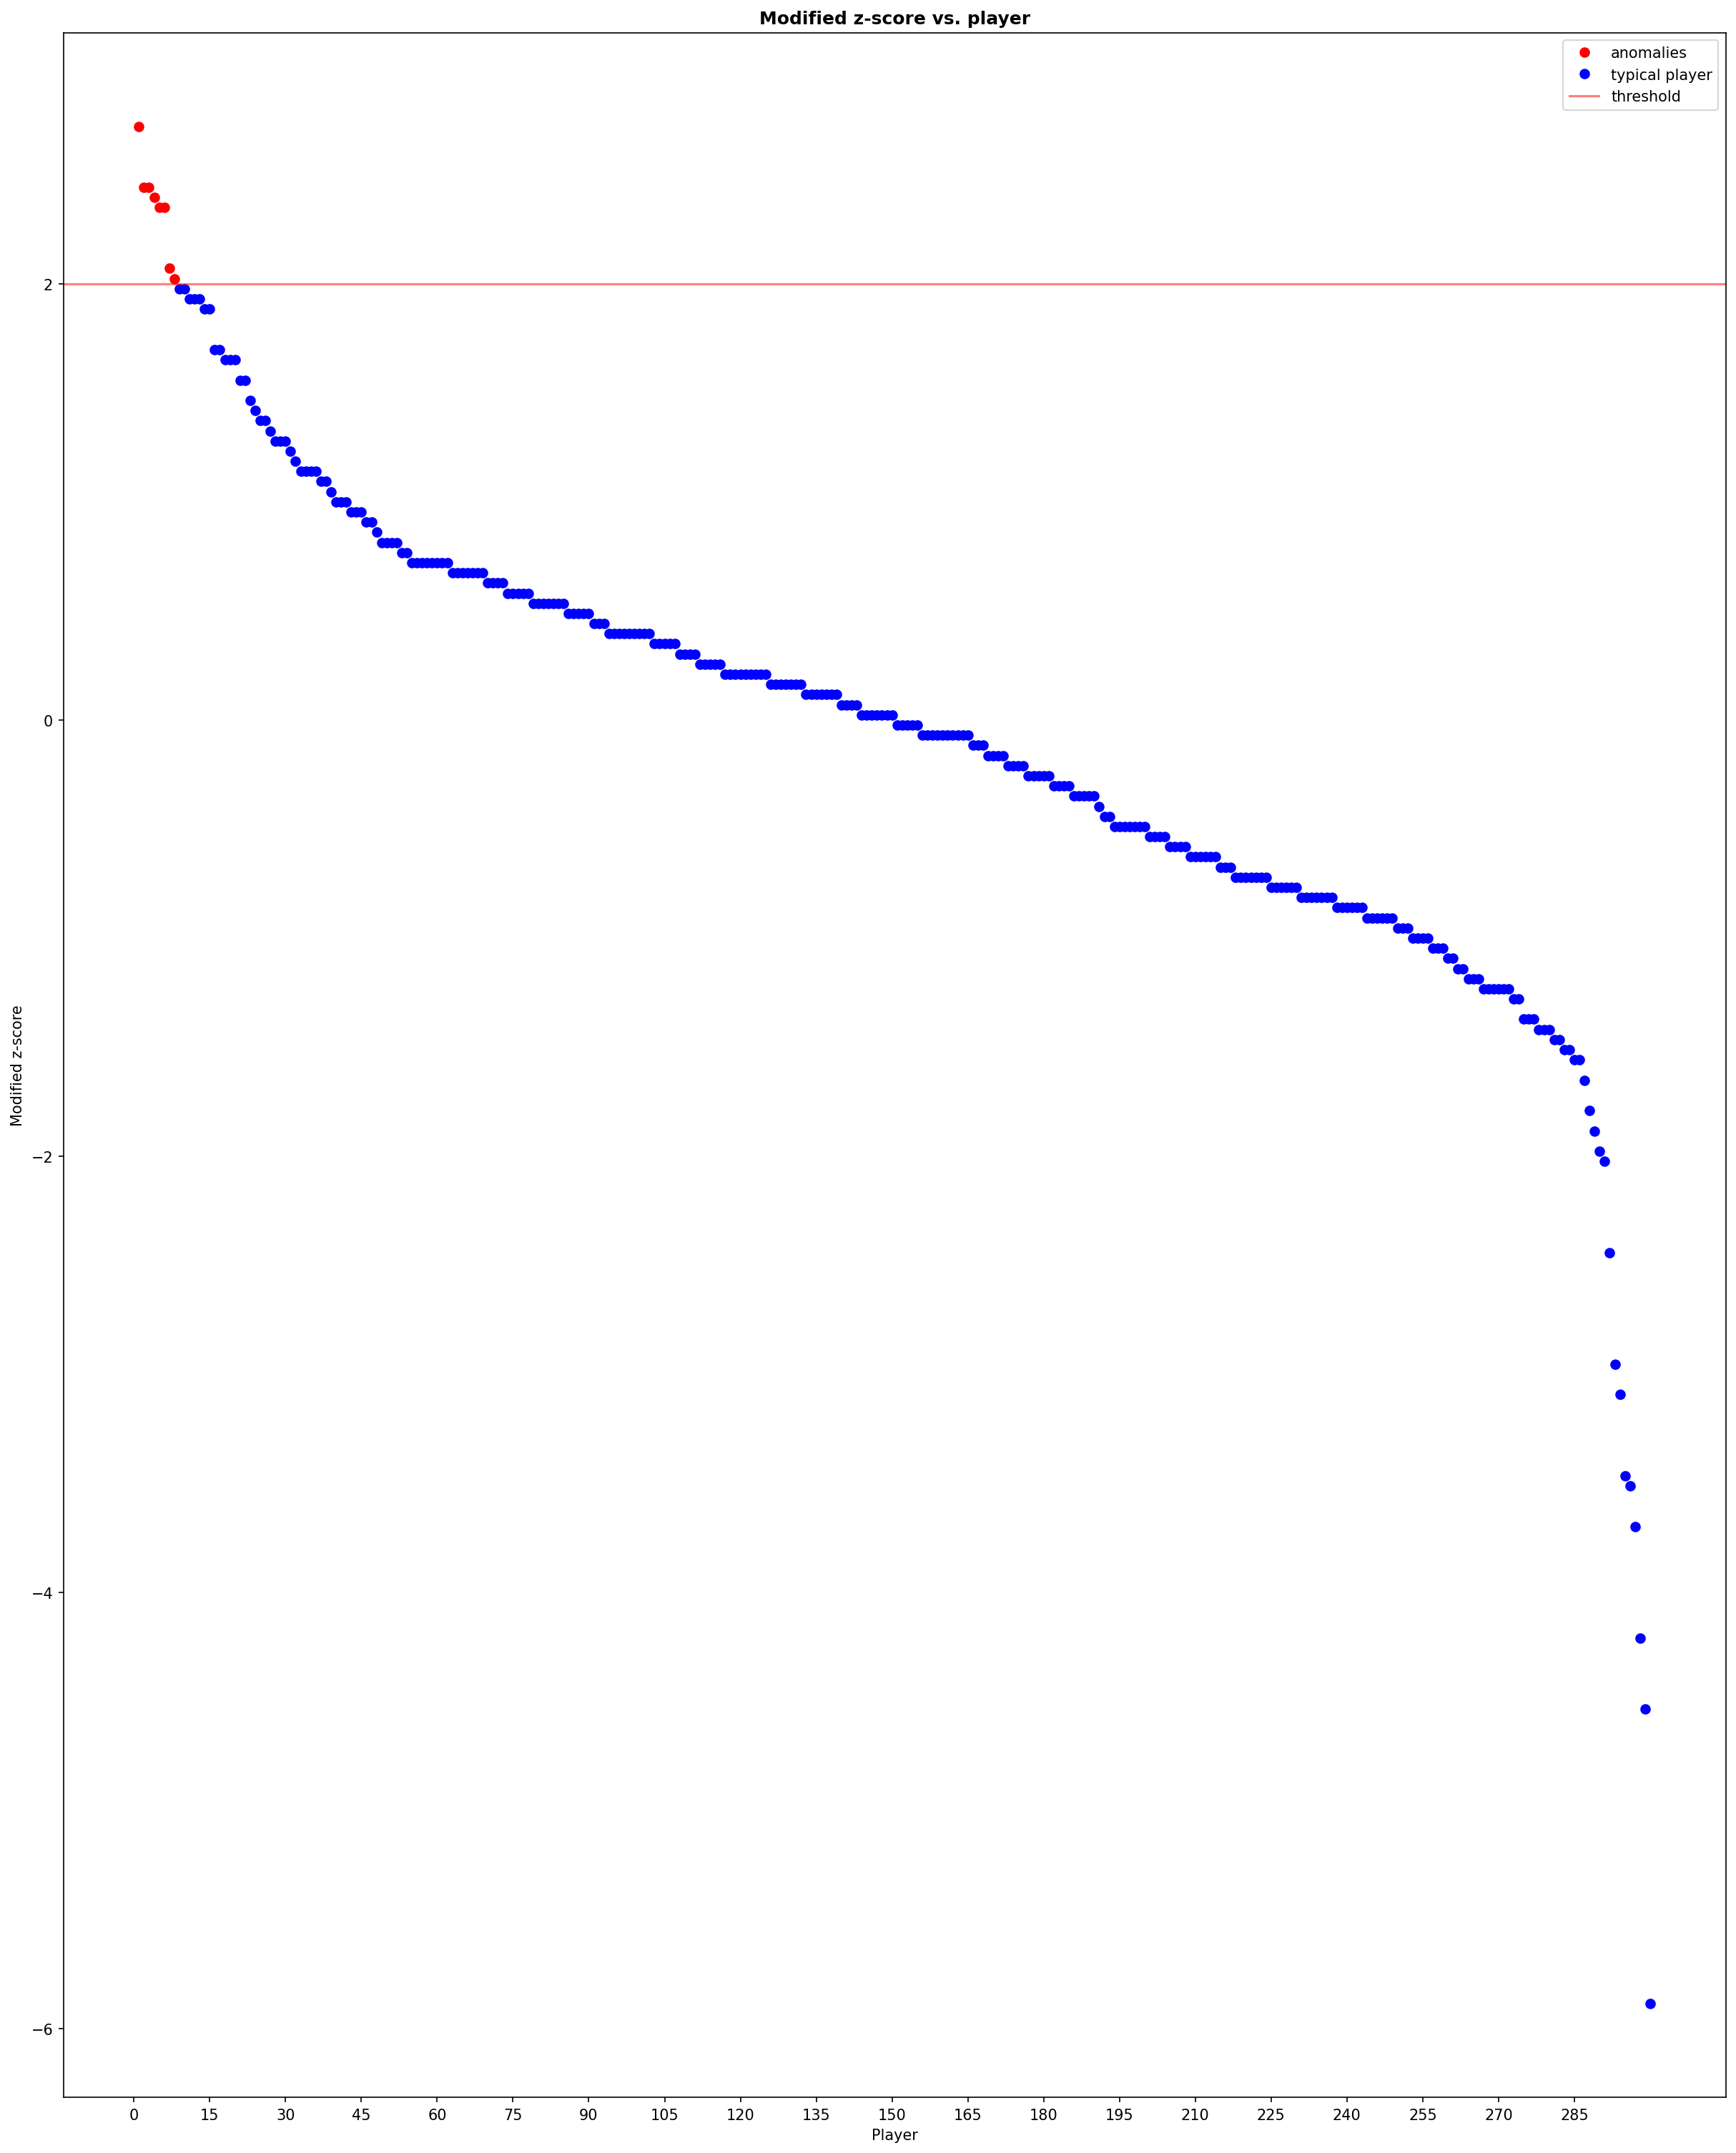

In [14]:
plot_anomaly_score_2(grade_math['mod_zscore'], 2)

## result and accuracy

### result and accuracy for zscore

In [15]:
#original anomaly
grade_math_anomaly = grade_math[(grade_math['Math_Score']<9) | (grade_math['Math_Score']>18)]
grade_math_anomaly

,Name,Gender,Class,Math_Score,zscore,mod_zscore
11,Charlotte Lewis,Female,7C,18.4,1.812957,1.976956
15,Poppy Davis,Female,7A,18.5,1.854039,2.023472
51,Ruby Allen,Female,7B,5.1,-3.650973,-4.209753
65,Sophia Smith,Female,7B,19.4,2.223778,2.442122
70,Freya Lewis,Female,7B,7.8,-2.541754,-2.953804
84,Alexander Moore,Male,7C,8.9,-2.089850,-2.442122
95,Benjamin Clark,Male,7B,20.0,2.470271,2.721221
106,Benjamin Scott,Male,7B,18.6,1.895121,2.069989
115,Rosie Anderson,Female,7D,19.2,2.141614,2.349089
120,Leo Smith,Male,7D,18.3,1.771874,1.930439


In [16]:
# pridiction anomaly
grade_math_anomaly_zscore = grade_math[grade_math['zscore'] > 2]

In [17]:
# change the column of dataframe in array
grade_original = grade_math_anomaly['Math_Score'].to_numpy()
grade_predict = grade_math_anomaly_zscore['Math_Score'].to_numpy()

In [18]:
grade_original

array([18.4, 18.5,  5.1, 19.4,  7.8,  8.9, 20. , 18.6, 19.2, 18.3, 19.4,
       18.2,  7.5,  1.5, 18.3,  4.4,  6.7, 18.2, 19.2,  6.2,  6.6, 18.3,
       18.4, 19.3])

In [19]:
grade_predict

array([19.4, 20. , 19.2, 19.4, 19.2, 19.3])

In [20]:
# find the length of array
len_grade_predict = len(grade_predict)
len_grade_original = len(grade_original)
max_len = max(len_grade_predict,len_grade_original)

In [21]:
# Filling a shorter array with "0"
if len_grade_predict < max_len:
    grade_predict = np.pad(grade_predict,(0, max_len - len_grade_predict) , 'constant' , constant_values=0)
elif len_grade_original < max_len:
    grade_original = np.pad(grade_original,(0, max_len - len_grade_original) , 'constant' , constant_values=0)

In [22]:
# find common members
common_elements = np.sum(np.isin(grade_original, grade_predict))

In [23]:
# Calculating the percentage of common members to the total
percentage = (common_elements / len(grade_original)) * 100

In [24]:
percentage

25.0

### result and accuracy for zscore

In [26]:
# pridiction anomaly
grade_math_anomaly_modified_zscore = grade_math[grade_math['mod_zscore'] > 2]

In [27]:
# change the column of dataframe in array
#grade_original = grade_math_anomaly['Math_Score'].to_numpy()
grade_predict1 = grade_math_anomaly_modified_zscore['Math_Score'].to_numpy()

In [28]:
grade_predict1

array([18.5, 19.4, 20. , 18.6, 19.2, 19.4, 19.2, 19.3])

In [29]:
# find the length of array
len_grade_predict1 = len(grade_predict1)
#len_grade_original = len(grade_original)
max_len1 = max(len_grade_predict1,len_grade_original)

In [30]:
# Filling a shorter array with "0"
if len_grade_predict1 < max_len:
    grade_predict = np.pad(grade_predict1,(0, max_len - len_grade_predict1) , 'constant' , constant_values=0)
elif len_grade_original < max_len:
    grade_original = np.pad(grade_original,(0, max_len - len_grade_original) , 'constant' , constant_values=0)

In [31]:
# find common members
common_elements1 = np.sum(np.isin(grade_original, grade_predict))

In [32]:
# Calculating the percentage of common members to the total
percentage1 = (common_elements1 / len(grade_original)) * 100

In [33]:
percentage1

33.33333333333333